1366224


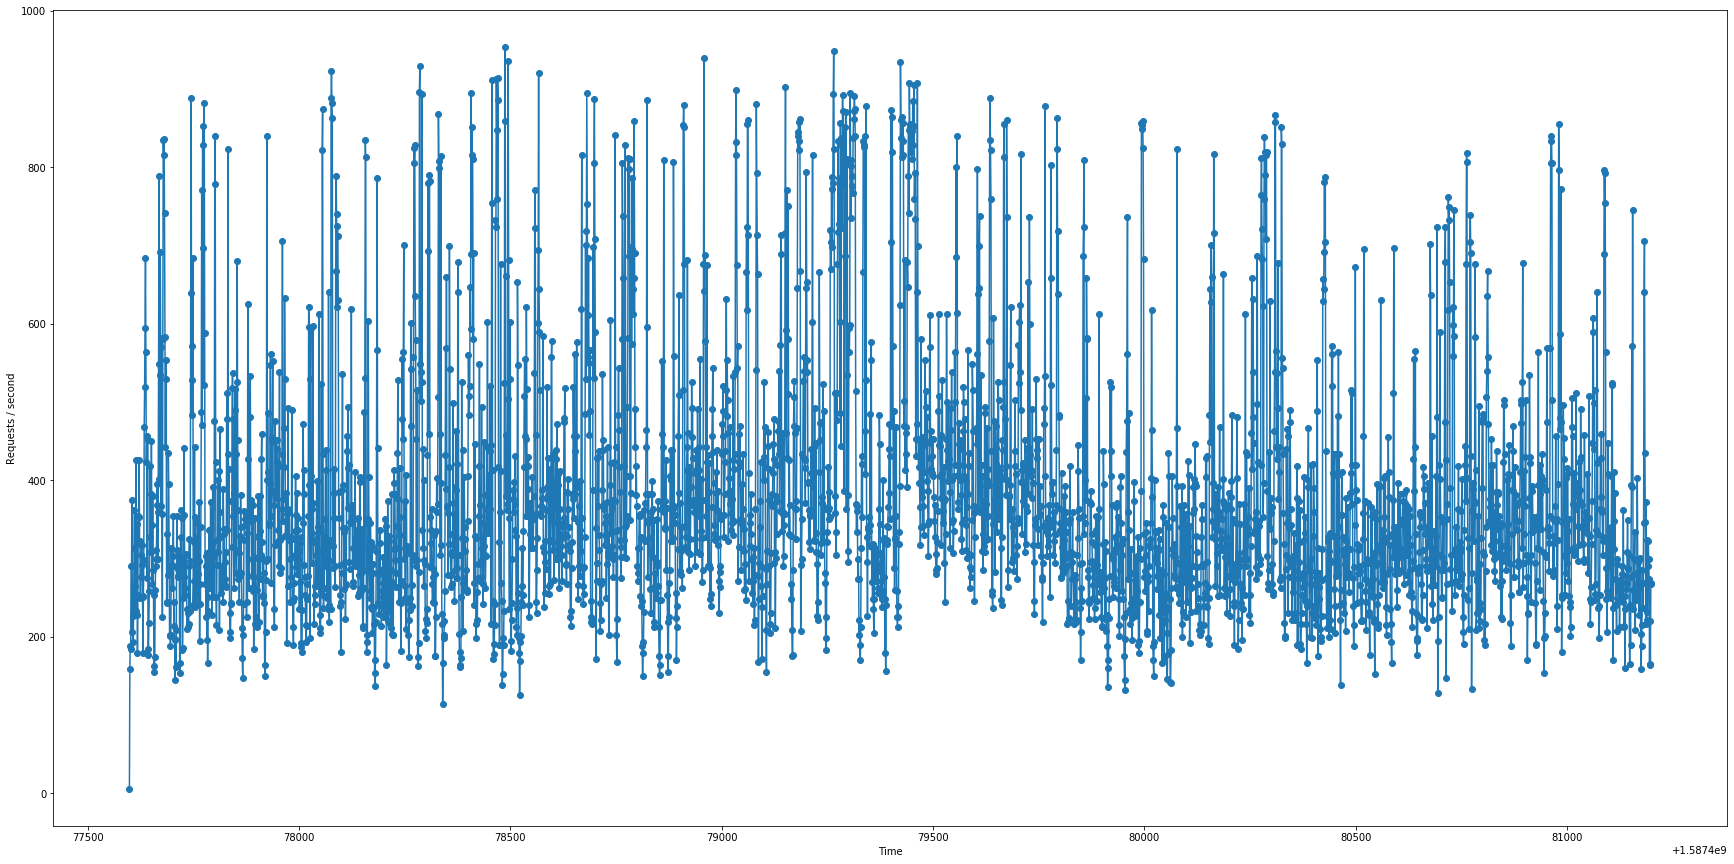

In [147]:
import matplotlib.pyplot as plt
import csv

folder_prefix = './'
# Request count plot

time=[]
request_count=[]
with open(folder_prefix + 'request_counts_by_second_Operation.csv', 'r') as csvfile:
    plots= csv.reader(csvfile, delimiter=',')
    #sum1=0
    for row in plots:
        time.append(int(row[0]))
        request_count.append(int(row[1]))
        #sum1=sum1+int(row[1])

plt.figure(figsize=(30,15))
plt.plot(time, request_count, marker='o')
plt.xlabel('Time')
plt.ylabel('Requests / second')
#print(sum1)

1366225


Text(0, 0.5, 'Time')

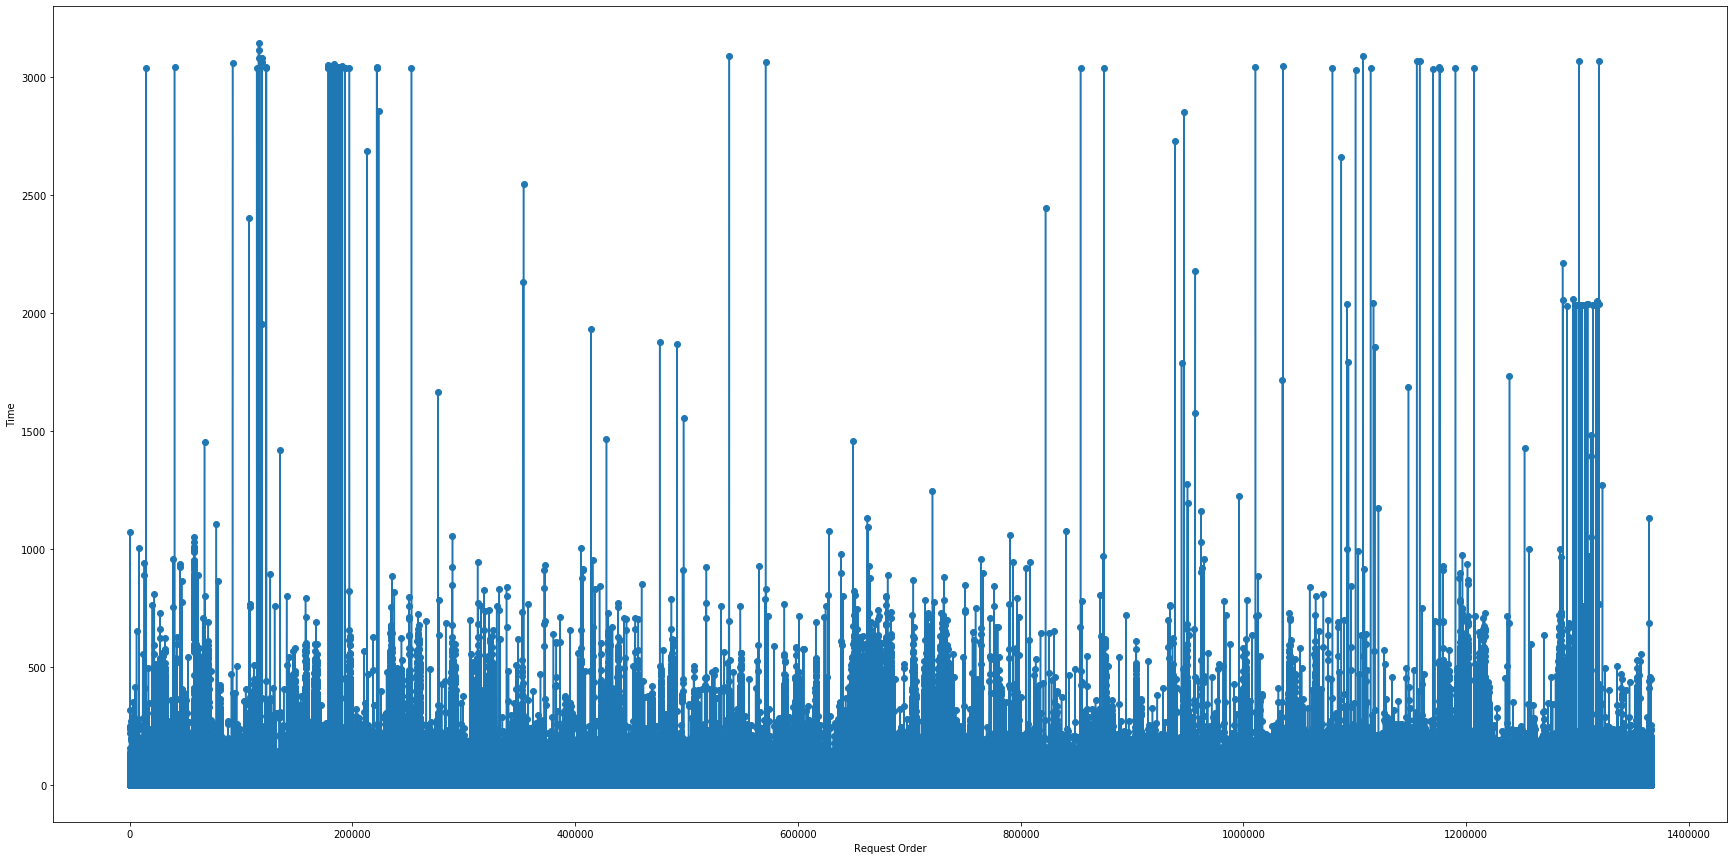

In [148]:
# Operation Latency Plot

request_number = []
latency_of_request = []

with open(folder_prefix + 'Operation_Latency.txt', 'r') as filestream:
    i = 1
    for line in filestream:
        currentline = line.split(",")
        latency_of_request.append(int(currentline[1]))
        request_number.append(i)
        i = i + 1    

#print(i)
plt.figure(figsize=(30,15))
plt.plot(request_number,latency_of_request, marker='o')
plt.xlabel('Request Order')
plt.ylabel('Time')


In [112]:
#Latency (milli seconds) table
import pandas as pd

operation_Latency = pd.read_csv (folder_prefix +'Operation_Latency.txt')
operation_Latency.columns = ['request_number','latency_of_request']

mean_latency = operation_Latency['latency_of_request'].mean()
p90_latency = operation_Latency['latency_of_request'].quantile(0.9)
p95_latency = operation_Latency['latency_of_request'].quantile(0.95)
p99_latency = operation_Latency['latency_of_request'].quantile(0.99)
p99_9_latency = operation_Latency['latency_of_request'].quantile(0.999)
p10_latency = operation_Latency['latency_of_request'].quantile(0.1)
p20_latency = operation_Latency['latency_of_request'].quantile(0.2)
p50_latency = operation_Latency['latency_of_request'].quantile(0.5)
p80_latency = operation_Latency['latency_of_request'].quantile(0.8)

latency_data = {'Latency (ms)':[mean_latency, p10_latency, p20_latency, p50_latency, p80_latency, p90_latency, p95_latency, p99_latency, p99_9_latency]}
operation_Latency_df = pd.DataFrame(latency_data , index = ['Mean_latency','p10_latency', 'p20_latency', 'p50_latency', 'p80_latency', 'p90_latency', 'p95_latency', 'p99_latency', 'p99.9_latency'])


In [113]:
operation_Latency_df.style

,Latency (ms)
Mean_latency,54.130902
p10_latency,23.000000
p20_latency,28.000000
p50_latency,33.000000
p80_latency,65.000000
p90_latency,96.000000
p95_latency,162.000000
p99_latency,315.000000
p99.9_latency,524.000000


In [114]:
#Request count per second table

req_cnt_df = pd.read_csv (folder_prefix + 'request_counts_by_second_Operation.csv')
req_cnt_df.columns = ['Time', 'No_of_Requests']

mean_requests = req_cnt_df['No_of_Requests'].mean()
p90_requests = req_cnt_df['No_of_Requests'].quantile(0.9)
p95_requests = req_cnt_df['No_of_Requests'].quantile(0.95)
p99_requests = req_cnt_df['No_of_Requests'].quantile(0.99)
p10_requests = req_cnt_df['No_of_Requests'].quantile(0.1)
p20_requests = req_cnt_df['No_of_Requests'].quantile(0.2)
p50_requests = req_cnt_df['No_of_Requests'].quantile(0.5)
p80_requests = req_cnt_df['No_of_Requests'].quantile(0.8)
p100_requests = req_cnt_df['No_of_Requests'].quantile(1.0)

req_cnt_data = {'Req / second ':[mean_requests, p10_requests, p20_requests, p50_requests, p80_requests, p90_requests, p95_requests, p99_requests, p100_requests]}
req_cnt_analysis_df = pd.DataFrame(req_cnt_data , index = ['Mean','p10_requests', 'p20_requests', 'p50_requests', 'p80_requests', 'p90_requests', 'p95_requests', 'p99_requests', 'p100_requests'])


In [115]:
req_cnt_analysis_df.style

,Req / second
Mean,379.505000
p10_requests,225.900000
p20_requests,260.000000
p50_requests,337.000000
p80_requests,463.000000
p90_requests,622.000000
p95_requests,786.000000
p99_requests,878.000000
p100_requests,953.000000


In [116]:
operation_Latency_df.values

array([[ 54.1309025],
       [ 23.       ],
       [ 28.       ],
       [ 33.       ],
       [ 65.       ],
       [ 96.       ],
       [162.       ],
       [315.       ],
       [524.       ]])

In [134]:
req_cnt_analysis_df.values.T[:,[0,8]]


array([[379.505, 953.   ]])

In [141]:
import numpy as np
result = np.dot(operation_Latency_df.values,req_cnt_analysis_df.values.T[:,[0,8]]) 

In [142]:
result = np.divide(result, 1000)

In [143]:
result

array([[ 20.54294815,  51.58675008],
       [  8.728615  ,  21.919     ],
       [ 10.62614   ,  26.684     ],
       [ 12.523665  ,  31.449     ],
       [ 24.667825  ,  61.945     ],
       [ 36.43248   ,  91.488     ],
       [ 61.47981   , 154.386     ],
       [119.544075  , 300.195     ],
       [198.86062   , 499.372     ]])

In [138]:
operation_Latency_df.values

array([[ 54.1309025],
       [ 23.       ],
       [ 28.       ],
       [ 33.       ],
       [ 65.       ],
       [ 96.       ],
       [162.       ],
       [315.       ],
       [524.       ]])

In [139]:
req_cnt_analysis_df.style

,Req / second
Mean,379.505000
p10_requests,225.900000
p20_requests,260.000000
p50_requests,337.000000
p80_requests,463.000000
p90_requests,622.000000
p95_requests,786.000000
p99_requests,878.000000
p100_requests,953.000000


In [140]:
new_result = np.concatenate((result,operation_Latency_df.values), axis=1)

pd.DataFrame(new_result , index = ['Mean latency','p10 latency', 'p20 latency', 'p50 latency', 'p80 latency', 'p90 latency', 'p95 latency', 'p99 latency', 'p99.9 latency'], columns = ['Avg MaxConns', 'Max Maxconns', 'Latency (ms)'])


,Avg MaxConns,Max Maxconns,Latency (ms)
Mean latency,20.542948,51.58675,54.130902
p10 latency,8.728615,21.91900,23.000000
p20 latency,10.626140,26.68400,28.000000
p50 latency,12.523665,31.44900,33.000000
p80 latency,24.667825,61.94500,65.000000
p90 latency,36.432480,91.48800,96.000000
p95 latency,61.479810,154.38600,162.000000
p99 latency,119.544075,300.19500,315.000000
p99.9 latency,198.860620,499.37200,524.000000
